In [7]:
import pandas as pd

In [8]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

In [9]:
df = pd.read_json(url)

In [10]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [11]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df_clean = pd.concat([df[['customerID', 'Churn']], customer_df, internet_df, account_df], axis=1)

df_clean.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [12]:
df_clean = df_clean.drop(columns=['customerID'])
df_clean.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [13]:
df_encoded=pd.get_dummies(df_clean, drop_first=True)

df_encoded.head()

,SeniorCitizen,tenure,Charges.Monthly,Churn_No,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,...,Charges.Total_995.35,Charges.Total_996.45,Charges.Total_996.85,Charges.Total_996.95,Charges.Total_997.65,Charges.Total_997.75,Charges.Total_998.1,Charges.Total_999.45,Charges.Total_999.8,Charges.Total_999.9
0,0,9,65.6,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,9,59.9,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,4,73.9,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,13,98.0,False,True,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,3,83.9,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
print(df_clean['Churn'].value_counts(normalize=True))

Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


In [15]:
from sklearn.utils import resample

df_majority = df_encoded[df_encoded['Churn_No'] == 1]
df_minority = df_encoded[df_encoded['Churn_Yes'] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])


In [16]:
from imblearn.over_sampling import SMOTE

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


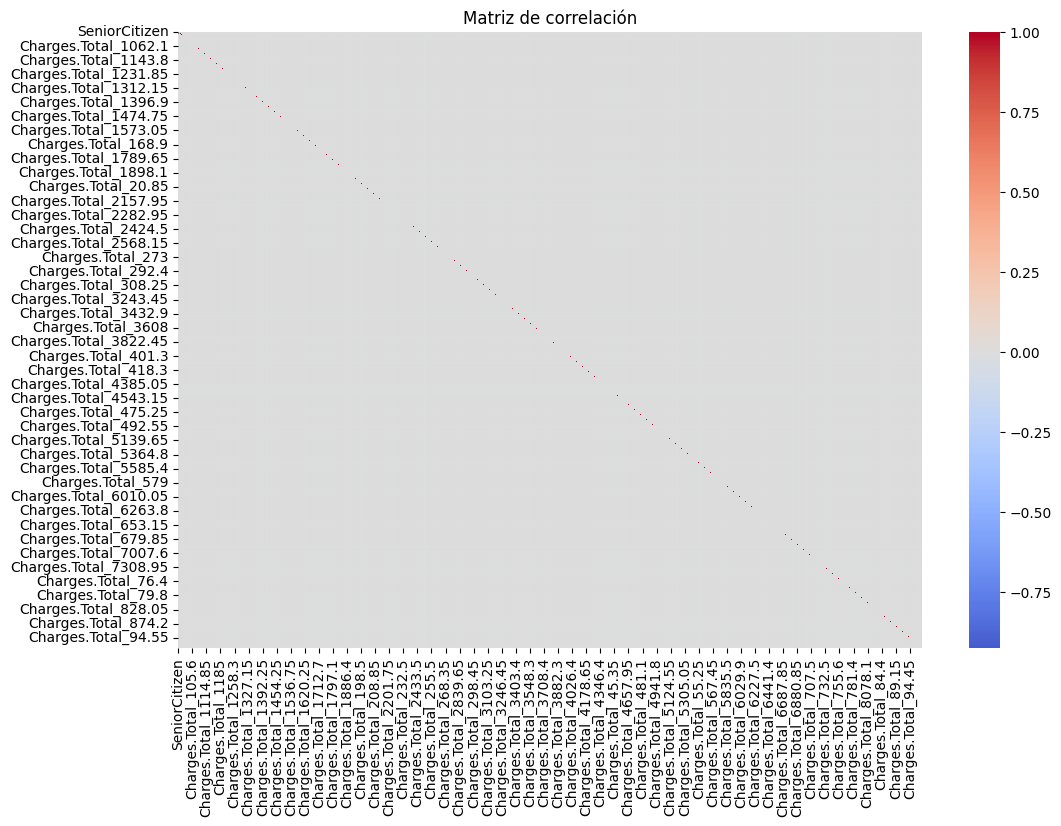

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()


In [19]:
corr_with_churn = df_encoded.corr()['Churn_Yes'].sort_values(ascending=False)
print(corr_with_churn)


Churn_Yes                             1.000000
InternetService_Fiber optic           0.300949
PaymentMethod_Electronic check        0.294626
Charges.Monthly                       0.189866
PaperlessBilling_Yes                  0.186666
                                        ...   
OnlineSecurity_No internet service   -0.224051
InternetService_No                   -0.224051
Contract_Two year                    -0.295138
tenure                               -0.344079
Churn_No                             -0.925160
Name: Churn_Yes, Length: 6558, dtype: float64


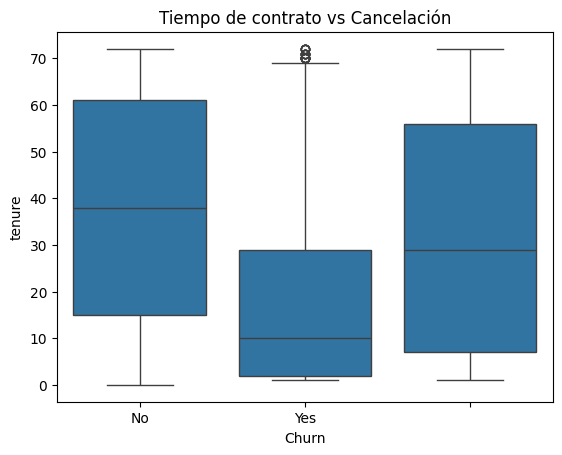

In [20]:
sns.boxplot(x="Churn", y="tenure", data=df_clean)
plt.title("Tiempo de contrato vs Cancelación")
plt.show()


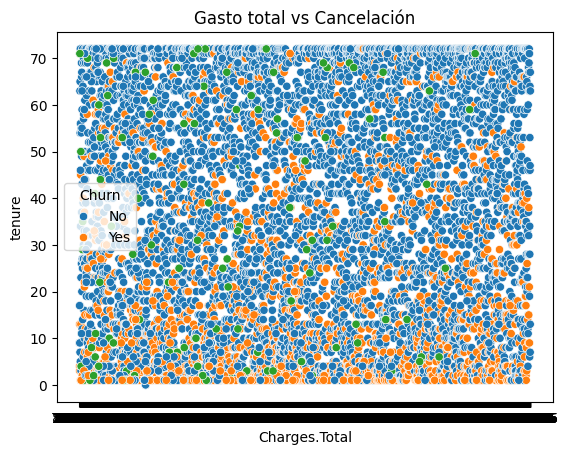

In [21]:
sns.scatterplot(x="Charges.Total", y="tenure", hue="Churn", data=df_clean)
plt.title("Gasto total vs Cancelación")
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)  # Variables predictoras
y = df_encoded['Churn_Yes']               # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predicciones
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluación
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98      1620
        True       0.91      1.00      0.95       561

    accuracy                           0.97      2181
   macro avg       0.95      0.98      0.97      2181
weighted avg       0.98      0.97      0.97      2181

Random Forest:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97      1620
        True       0.93      0.91      0.92       561

    accuracy                           0.96      2181
   macro avg       0.95      0.94      0.94      2181
weighted avg       0.96      0.96      0.96      2181



In [26]:
import numpy as np

coef = log_reg.coef_[0]
features = X_train.columns
importance = pd.DataFrame({'Feature': features, 'Coefficient': coef})
importance.sort_values(by='Coefficient', ascending=False).head(10)


,Feature,Coefficient
127,Charges.Total_1052.35,0.724113
5753,Charges.Total_740.3,0.641184
619,Charges.Total_1327.15,0.637680
4359,Charges.Total_5154.6,0.552851
5275,Charges.Total_6579.05,0.539907
1635,Charges.Total_20.15,0.537725
4056,Charges.Total_4759.75,0.524485
69,Charges.Total_1021.8,0.522385
2763,Charges.Total_3147.5,0.475490
366,Charges.Total_1182.55,0.469146


In [27]:
importances = rf.feature_importances_
features = X_train.columns
importance_rf = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_rf.sort_values(by='Importance', ascending=False).head(10)


,Feature,Importance
3,Churn_No,0.395156
1,tenure,0.067652
2,Charges.Monthly,0.047035
22,Contract_Two year,0.030612
7,InternetService_Fiber optic,0.023297
25,PaymentMethod_Electronic check,0.018285
16,TechSupport_Yes,0.017055
10,OnlineSecurity_Yes,0.015379
21,Contract_One year,0.014861
23,PaperlessBilling_Yes,0.014275
